In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
df = pd.read_csv(r"C:Online Retail - Unsupervised learning\online_retail_II.csv")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.describe().round(2)

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [6]:
df.shape

(1067371, 8)

1. Take care of negative values in quantity n price (could be returns)
2. invoice to date change to datetime
3. drop null

In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df = df.dropna(subset=['Customer ID'])

In [9]:
df = df[(df['Quantity']>0) & (df['Price']>0)]

In [10]:
df.isnull().sum()


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [13]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5181
REGENCY CAKESTAND 3 TIER              3428
ASSORTED COLOUR BIRD ORNAMENT         2777
JUMBO BAG RED RETROSPOT               2702
REX CASH+CARRY JUMBO SHOPPER          2141
                                      ... 
ASSORTED DESIGN GEISHA GIRL MUGS         1
S/3 ROSE GARDEN SCENT SQU CANDLE         1
CHOCOLATE ICE CREAM CANDLE               1
S/4 BLACK DISCO PARTITION PANEL          1
TINY CRYSTALS BRACELET BLACK             1
Name: count, Length: 5283, dtype: int64

In [14]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,805549.000000,805549,805549.000000,805549.000000
mean,13.290522,2011-01-02 10:24:44.106814464,3.206561,15331.954970
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-07 12:08:00,1.250000,13982.000000
50%,5.000000,2010-12-03 15:10:00,1.950000,15271.000000
75%,12.000000,2011-07-28 13:05:00,3.750000,16805.000000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000
std,143.634088,NaN,29.199173,1696.737039


# Feature Engineering

In [15]:
df['TotalPrice'] = df["Quantity"] * df["Price"] #sum spending per customer

In [16]:
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1) #fixed date reference used to calculate how recent the customer bought something
print('snapshot_date:' ,snapshot_date)

snapshot_date: 2011-12-10 12:50:00


In [17]:
rfm = df.groupby('Customer ID').agg({ #groups all transcations per customer
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, #Recency #to find how many days since last purchase
    'Invoice':'nunique', #frequency #count how many unique invoices
    'TotalPrice': 'sum'   #monetary #add up total money spent
}).reset_index() #reset index to keep it clean

In [18]:
rfm.rename(columns={
    'InvoiceDate':'Recency',
    'Invoice': 'Frequency',
    'TotalPrice':'Monetary'  
},inplace=True)

In [19]:
print(rfm.shape)

(5878, 4)


In [20]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40


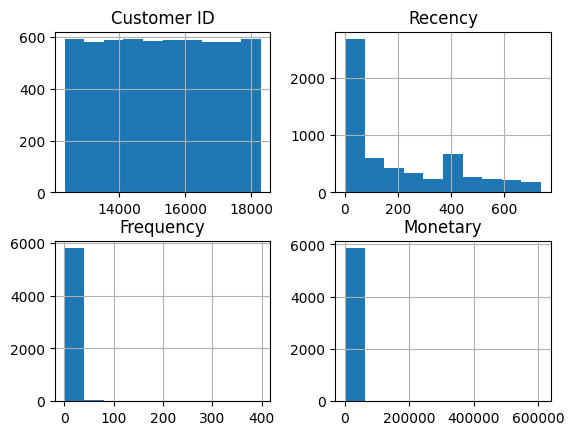

In [21]:
rfm.hist()
plt.show()

In [22]:
rfm.describe()

,Customer ID,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,201.331916,6.289384,3018.616737
std,1715.572666,209.338707,13.009406,14737.731040
min,12346.000000,1.000000,1.000000,2.950000
25%,13833.250000,26.000000,1.000000,348.762500
50%,15314.500000,96.000000,3.000000,898.915000
75%,16797.750000,380.000000,7.000000,2307.090000
max,18287.000000,739.000000,398.000000,608821.650000


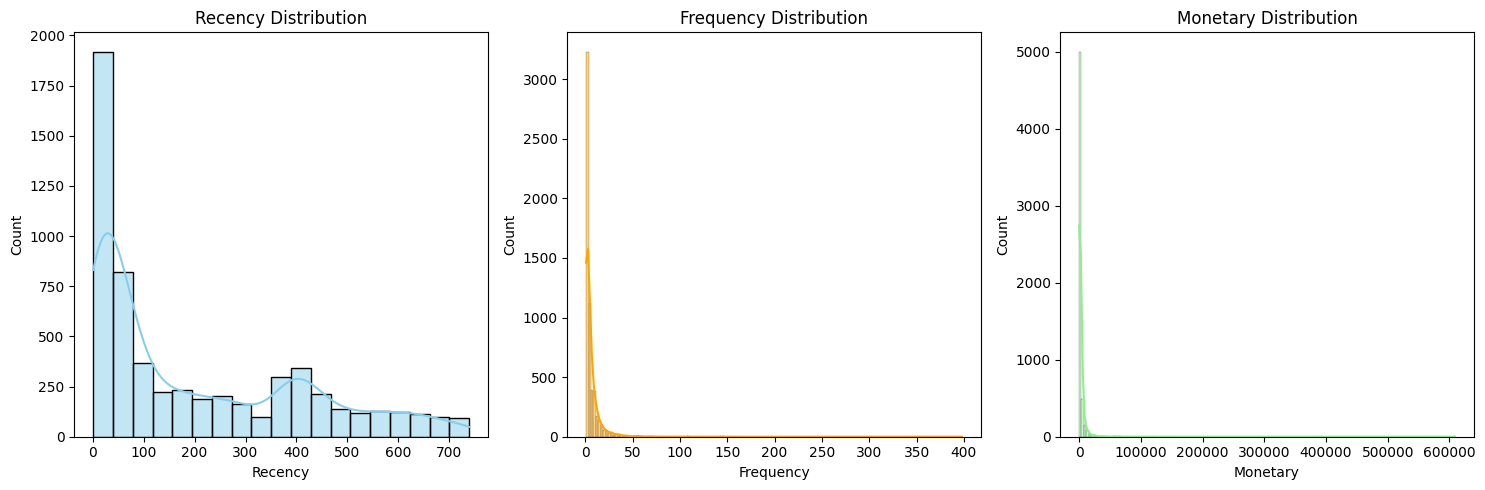

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], ax=axes[0], kde=True, color='skyblue')
sns.histplot(rfm['Frequency'], ax=axes[1], kde=True, color='orange')
sns.histplot(rfm['Monetary'], ax=axes[2], kde=True, color='lightgreen')

axes[0].set_title('Recency Distribution')
axes[1].set_title('Frequency Distribution')
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()


In [24]:
rfm = rfm[rfm['Monetary'] < rfm['Monetary'].quantile(0.99)] #to remove customers with extremely high spend

In [25]:
rfm = rfm[rfm['Frequency'] < rfm['Frequency'].quantile(0.99)] #even if you dont u will still get same results as graph below where monetary is at 7 so this is optional

In [26]:
rfm.describe()

,Customer ID,Recency,Frequency,Monetary
count,5757.000000,5757.000000,5757.000000,5757.000000
mean,15316.645475,204.785652,5.063748,1931.117670
std,1713.880536,209.630297,5.664153,3017.417773
min,12347.000000,1.000000,1.000000,2.950000
25%,13837.000000,28.000000,1.000000,341.360000
50%,15318.000000,103.000000,3.000000,854.990000
75%,16798.000000,382.000000,6.000000,2140.280000
max,18287.000000,739.000000,35.000000,28882.440000


In [27]:
rfm.isna().sum()

Customer ID    0
Recency        0
Frequency      0
Monetary       0
dtype: int64

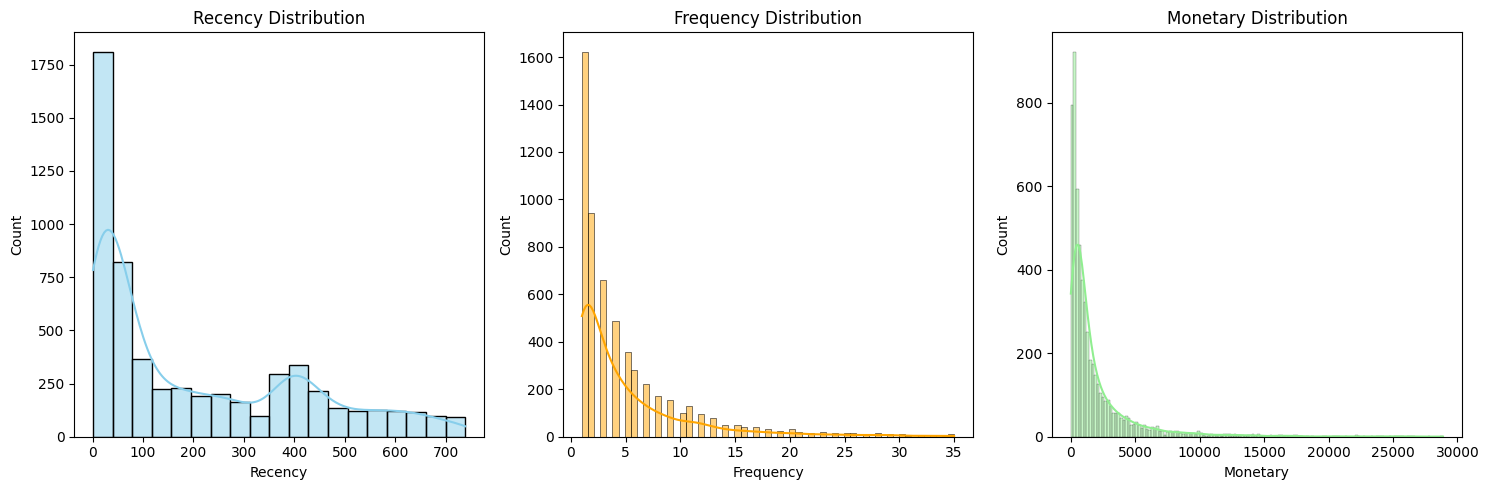

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], ax=axes[0], kde=True, color='skyblue')
sns.histplot(rfm['Frequency'], ax=axes[1], kde=True, color='orange')
sns.histplot(rfm['Monetary'], ax=axes[2], kde=True, color='lightgreen')

axes[0].set_title('Recency Distribution')
axes[1].set_title('Frequency Distribution')
axes[2].set_title('Monetary Distribution')
plt.tight_layout()
plt.show()


Log Transform (to reduce skewness).

In [ ]:
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x:np.log1p(x)) 


#np.log1p(x) means log(1 + x) → safe for zeros. Reduces skewness and normalizes value spread.

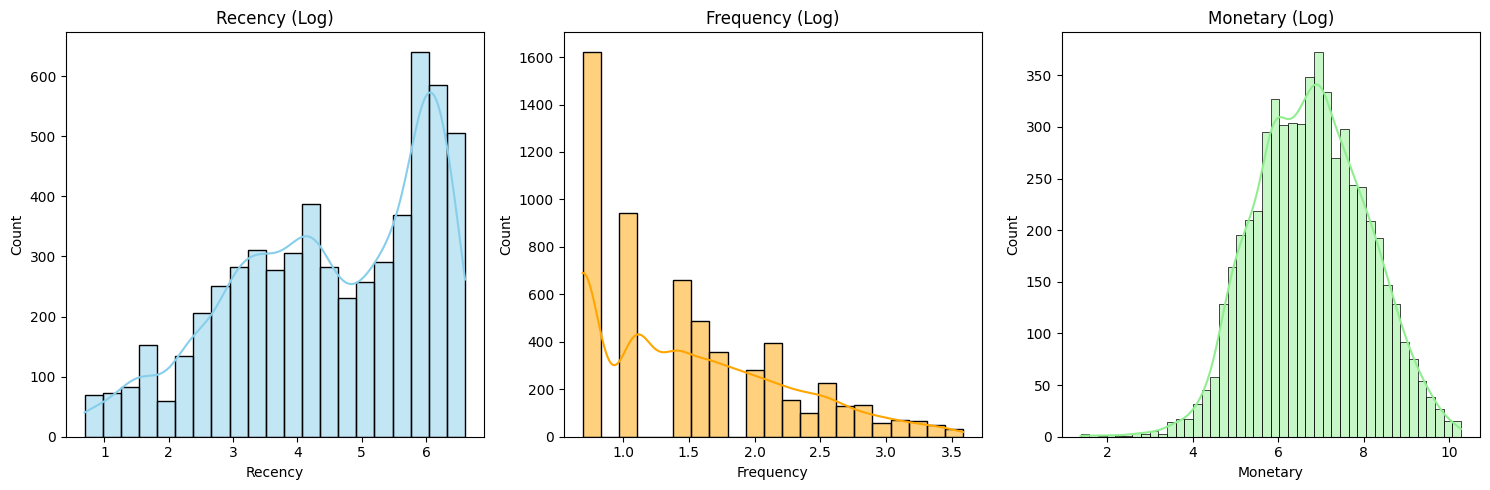

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm_log['Recency'], ax=axes[0], kde=True, color='skyblue')
sns.histplot(rfm_log['Frequency'], ax=axes[1], kde=True, color='orange')
sns.histplot(rfm_log['Monetary'], ax=axes[2], kde=True, color='lightgreen')

axes[0].set_title('Recency (Log)')
axes[1].set_title('Frequency (Log)')
axes[2].set_title('Monetary (Log)')
plt.tight_layout()
plt.show()

Scaling the features to contribute equally since K-Means uses Euclidean distance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_log)

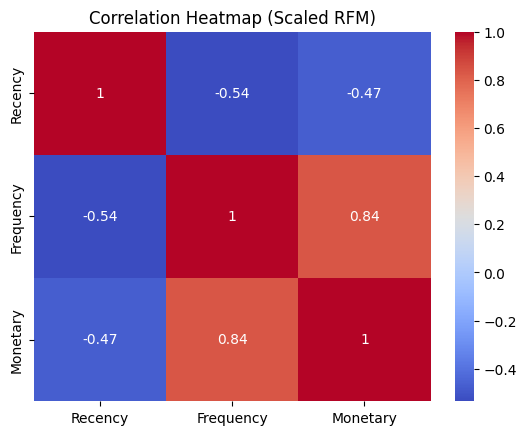

In [37]:
sns.heatmap(rfm_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Scaled RFM)')
plt.show()

Converting back to DataFrame (for readability)

In [ ]:
rfm_scaled = pd.DataFrame(
    rfm_scaled,
    index=rfm.index,
    columns=["Recency", 'Frequency', 'Monetary']
)

In [33]:
rfm_scaled.head() #now every column has mean = 0 , std = 1 

,Recency,Frequency,Monetary
1,-2.230811,0.952785,1.443627
2,-0.112501,0.399009,0.653354
3,-0.987452,0.149998,1.258271
4,0.810986,-1.101455,-0.730364
5,0.935378,-1.101455,-0.811373


Finding The Optimal Number of Clusters (Elbow & Silhouette).

The Elow method is where adding another cluster stops giving big gains.

In [ ]:
from sklearn.cluster import KMeans

inertia=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

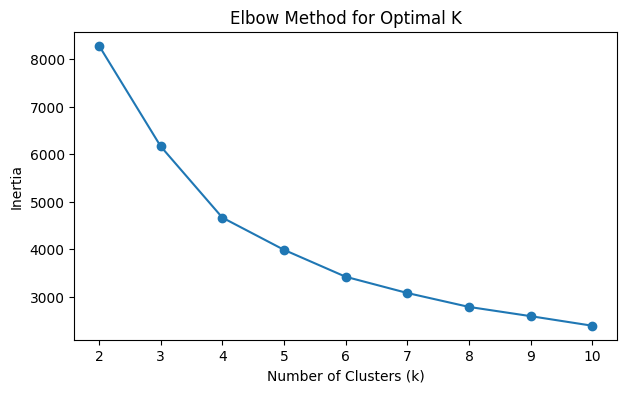

In [35]:
plt.figure(figsize=(7,4))
plt.plot(range(2,11),inertia, marker ='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [36]:
#Sillhoutte score measures how well each point fits its cluster (1 = perfect separation)

from sklearn.metrics import silhouette_score 

for k in range(2,8):
    kmeans = KMeans(n_clusters = k, random_state =42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f'k={k}: Silhouette Score = {score:.3f}')

k=2: Silhouette Score = 0.437
k=3: Silhouette Score = 0.345
k=4: Silhouette Score = 0.370
k=5: Silhouette Score = 0.324
k=6: Silhouette Score = 0.330
k=7: Silhouette Score = 0.295


Pick K with the highest score just not the first cluster lol

In [38]:
best_k = 4 

kmeans = KMeans(n_clusters=best_k, random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [39]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
1,12347.0,2,8,5633.32,0
2,12348.0,75,5,2019.40,1
3,12349.0,19,4,4428.69,0
4,12350.0,310,1,334.40,3
5,12351.0,375,1,300.93,3


In [40]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).round(1)

To better understand the cluster profiles by representing the average RFM

In [41]:
cluster_summary.columns = ['RecencyMean', 'FrequencyMean','MonetaryMean','NumCustomers']
cluster_summary = cluster_summary.sort_values(by='MonetaryMean', ascending=False)
cluster_summary

,RecencyMean,FrequencyMean,MonetaryMean,NumCustomers
Cluster,,,,
0,31.8,13.1,5600.8,1280
1,250.1,4.6,1704.6,1443
2,29.9,2.8,787.5,1183
3,400.8,1.3,301.0,1851


RecencyMean (lower = better):
~30 days means they bought about a month ago.
~400 days means they haven’t bought in over a year (basically gone).

FrequencyMean (higher = better):
How many unique invoices / purchases they made.

MonetaryMean (higher = $$$):
How much they typically spend total.

Cluster 0

Recency ≈ 32 days → recently active

Frequency ≈ 13.1 → buys a lot

Monetary ≈ 5600 → spends a LOT

NumCustomers: 1280
👉 These are your whales.
Name: “High-Value Loyalists” / “Champions”
Business action: VIP perks, loyalty rewards, retention priority

Cluster 1

Recency ≈ 250 days → haven’t bought in a while

Frequency ≈ 4.6 → used to buy repeat

Monetary ≈ 1704 → solid spenders historically
👉 They were good customers but cooling off.
Name: “At-Risk Loyal Buyers”
Business action: Winback campaigns, coupons, reactivation emails

Cluster 2

Recency ≈ 30 days → very recent activity

Frequency ≈ 2.8 → only a few purchases so far

Monetary ≈ ~787 → mid spend
👉 These are fairly new but active. Could become champions.
Name: “Promising New Customers” / “Growth Segment”
Business action: Upsell, onboarding flows, nurture them

Cluster 3

Recency ≈ 401 days → basically dormant

Frequency ≈ 1.3 → almost no repeat behavior

Monetary ≈ 301 → low value

NumCustomers: 1851 (largest group)
👉 Low-spend one-timers, mostly churned.
Name: “Low-Value Dormant / One-Time Buyers”
Business action: Low priority, broad promo marketing only


| Cluster | Segment Name               | Behavior Summary                                                 | Strategy                                          |
| ------- | -------------------------- | ---------------------------------------------------------------- | ------------------------------------------------- |
| 0       | 💎 High-Value Loyalists    | Buy frequently, spend the most, recently active                  | Loyalty perks, exclusives, don’t lose them        |
| 1       | ⚠️ At-Risk Loyal Buyers    | Used to spend a lot, now inactive for ~250 days                  | Winback discounts, targeted reactivation          |
| 2       | 🌱 Promising New Customers | Recent buyers with moderate spend; early-stage loyalty potential | Upsell, nurture, personalized recommendations     |
| 3       | 💤 Dormant One-Time Buyers | Haven’t bought in 400+ days, low spend, barely repeat            | Low-cost broad campaigns / ignore for VIP efforts |

We’ll use PCA to reduce RFM (3D) into 2D for visualization.


In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

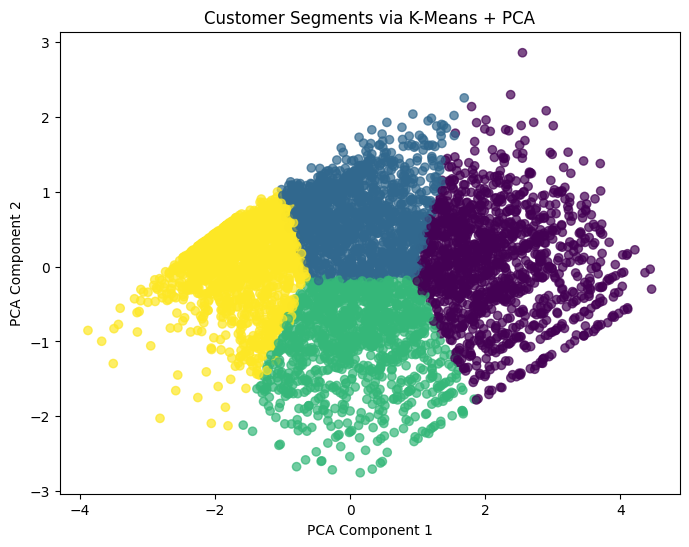

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1],c=rfm['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segments via K-Means + PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

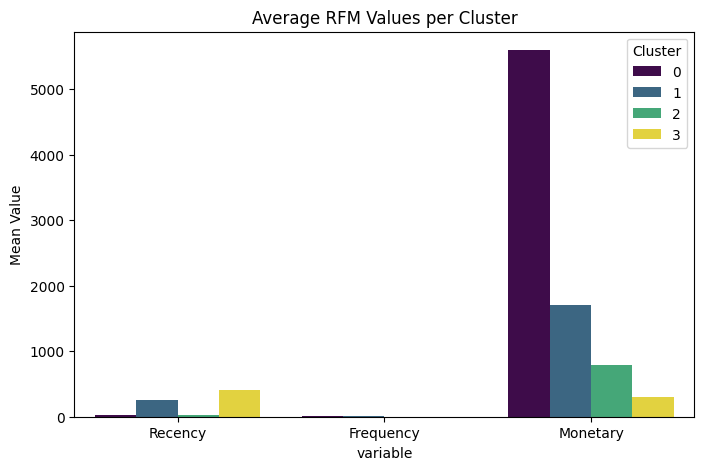

In [45]:
rfm_melted = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().reset_index()
rfm_melted = pd.melt(rfm_melted, id_vars='Cluster')

plt.figure(figsize=(8,5))
sns.barplot(data=rfm_melted, x='variable', y='value', hue='Cluster', palette='viridis')
plt.title('Average RFM Values per Cluster')
plt.ylabel('Mean Value')
plt.show()

In [47]:
rfm.to_csv('clustered_customers.csv', index=False)